In [1]:
# read in png images of specified suffix within given folder(s),
# write gif (with specified kwargs) to current directory
#----------------------------------------------------------------

# set path for folder in which images are stored...
#
# (1) if MainFolder is provided, search for images in each folder within main folder
#
#                          |-- folder2 (search here)
# MainFolder (no search) --|
#                          |-- folder1 (search here)
# 
#
# (2) else if SingleFolder provided, 
# will only search for images in the given directory
#              
# SingleFolder (search here)
#

### Make GIF

In [14]:
# import dependencies
import glob
import numpy as np
import imageio

# time
from datetime import datetime, timedelta

#==============================================================
# PROVIDE ONE OR THE OTHER FOLDER BELOW, 
# SET OTHER FOLDER YOU'RE NOT PROVIDING = []
#-------------------------------------------
MainFolder = []
SingleFolder = []


# MainFolder = '/Users/mackenziejewell/Downloads/'
SingleFolder = '/Users/mackenziejewell/Downloads/'

# Suffix of images to collect during search
#------------------------------------------
Suffix = ".png"

# Format of date name in file
# (date should come right before suffix, and after last underscore _ )
#---------------------------
FileDateFormat = "%Y-%m-%d"

# duration of each frame (in seconds)
#------------------------------------
dur = 0.25
#==============================================================

date_list = []
image_list =[]
# find all folders in main directory
# or look in single folder provided
if MainFolder != []:
    folder_list = glob.glob(MainFolder+"*/")
    SaveFolder = MainFolder
elif SingleFolder != []:
    folder_list = glob.glob(SingleFolder)
    SaveFolder = SingleFolder
    
# find list of images in each folder
for folder in folder_list:
    local_images = glob.glob1(folder, "*"+Suffix)
    # add each image to image_list (with local folder in name)
    # and store each image date in date_list
    for image in local_images:
        
        image_date_string = (image.split('_')[-1]).split('.png')[0]
        image_date = datetime.strptime(image_date_string, FileDateFormat)
        
        date_list.append(image_date)
        image_list.append(folder+image)

# combine lists and sort by date
sequential_list = np.stack((date_list,image_list), axis=1)
sequential_list = sequential_list[sequential_list[:,0].argsort()]

# create imageio list of images
im_list = []
for im in (sequential_list)[:,1]:
    im_list.append(imageio.v2.imread(im))

# name of gif from first and last dates in sequence
exportname = '{}_to_{}{}.gif'.format(sequential_list[0,0], sequential_list[-1,0], Suffix)
print('GIF will be named: {}\n-----------------'.format(exportname))
print('GIF will be saved to: {}\n--------------------'.format(SaveFolder))
print('\nFrames to compile into GIF:\n--------------------------\n', 
      sequential_list[0:2],'\n...\n', sequential_list[-2:])



ValueError: time data '2020' does not match format '%Y-%m-%d'

In [18]:
# Create GIF from image list generated above
#==============================================================
# set new exportname for GIF below if desired
# else, comment out line below
#--------------------------------------------
# exportname = 
#==============================================================
imageio.plugins.freeimage.download()

# write gif with specified **{kwargs}
imageio.mimwrite(SaveFolder+exportname,  im_list, 'GIF-FI', **{'duration':dur, 'quantizer':'nq'})


# MORE INFO ON KWARGS: 
# https://imageio.readthedocs.io/en/stable/format_gif-fi.html#gif-fi

# duration : {float, list}
#-------------------------
# The duration (in seconds) of each frame. 
# Either specify one value that is used for all frames, or one value for each frame. 
# Note that in the GIF format the duration/delay is expressed in hundredths of a second, 
# which limits the precision of the duration.

# fps : float
#------------
# The number of frames per second. 
# If duration is not given, the duration for each frame is set to 1/fps. Default 10.

# quantizer : {‘wu’, ‘nq’}
#-------------------------
# The quantization algorithm:
# wu - Wu, Xiaolin, Efficient Statistical Computations for Optimal Color Quantization
# nq (neuqant) - Dekker A. H., Kohonen neural networks for optimal color quantization

# loop : int
#-----------
# The number of iterations. Default 0 (meaning loop indefinitely)

# create .avi video from imagery (use Copy_Files to copy desired images to single folder to create animation)

In [5]:

# DON'T KNOW WHY THAT ANACONDA INSTALLED OPENCV STOPPED POINTING TO CV2
# HAD TO PIP INSTALL
# pip install opencv-python
import cv2
import os, glob
import numpy as np
# import imageio
from LIB_plot_MODIS import get_MODISdate
from LIB_print_func import print_line, print_boxed

#==============================================================
# PROVIDE ONE OR THE OTHER FOLDER BELOW, 
# SET OTHER FOLDER YOU'RE NOT PROVIDING = []
#-------------------------------------------
Folder = '/Volumes/Jewell_EasyStore/MODIS_2012_animation/updated/animation/'

# Suffix of images to collect during search
#------------------------------------------
Suffix = "_base"
ImageType = ".png"

Prefix_SaveName = "MODIS_2012_animation"

# duration of each frame (in seconds)
#------------------------------------
dur = 0.25
#==============================================================


datestring_list = []
date_list = []
image_list =[]

local_images = glob.glob1(Folder, "*"+Suffix+ImageType)
# add each image to image_list (with local folder in name)
# and store each image date in date_list
for image in local_images:
    imdate = get_MODISdate(image)
    date = '{}{}.{}{}'.format(imdate.strftime('%Y'), imdate.strftime('%j'), imdate.strftime('%H'), imdate.strftime('%M'))
    datestring_list.append(date)
    date_list.append(imdate)
    image_list.append(Folder+image)
# combine lists and sort by date
sequential_list = np.stack((datestring_list,image_list,date_list), axis=1)
sequential_list = sequential_list[sequential_list[:,0].argsort()]

# name of gif from first and last dates in sequence
exportname = '{}_{}_to_{}{}.avi'.format(Prefix_SaveName,sequential_list[0,0], sequential_list[-1,0], Suffix)
print('video will be named: {}\n-----------------'.format(exportname))
print('video will be saved to: {}\n--------------------'.format(Folder))
print(f'\nCompile {len(sequential_list)} frames into video:\n--------------------------\n', sequential_list[0:2],'\n...\n...\n...\n', sequential_list[-2:])

images = sequential_list[:,1]
frame = cv2.imread(os.path.join(Folder, images[0]))
height, width, layers = frame.shape


# for avi:
fourcc = 0

# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
# fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    
video = cv2.VideoWriter(Folder+exportname, fourcc, 1/dur, (width,height))

ii = 0
for image in images:
    ii+=1
    try:
        video.write(cv2.imread(os.path.join(Folder, image)))
    except:
        print(image)
        
cv2.destroyAllWindows()
video.release()

video will be named: MODIS_2012_animation_2012078.0540_to_2012083.0600_base.avi
-----------------
video will be saved to: /Volumes/Jewell_EasyStore/MODIS_2012_animation/updated/animation/
--------------------

Compile 16 frames into video:
--------------------------
 [['2012078.0540'
  '/Volumes/Jewell_EasyStore/MODIS_2012_animation/updated/animation/MOD021KM.A2012078.0540_base.png'
  datetime.datetime(2012, 3, 18, 5, 40)]
 ['2012078.1255'
  '/Volumes/Jewell_EasyStore/MODIS_2012_animation/updated/animation/MYD021KM.A2012078.1255_base.png'
  datetime.datetime(2012, 3, 18, 12, 55)]] 
...
...
...
 [['2012082.2155'
  '/Volumes/Jewell_EasyStore/MODIS_2012_animation/updated/animation/MOD021KM.A2012082.2155_base.png'
  datetime.datetime(2012, 3, 22, 21, 55)]
 ['2012083.0600'
  '/Volumes/Jewell_EasyStore/MODIS_2012_animation/updated/animation/MOD021KM.A2012083.0600_base.png'
  datetime.datetime(2012, 3, 23, 6, 0)]]


(-0.05, 10.0)

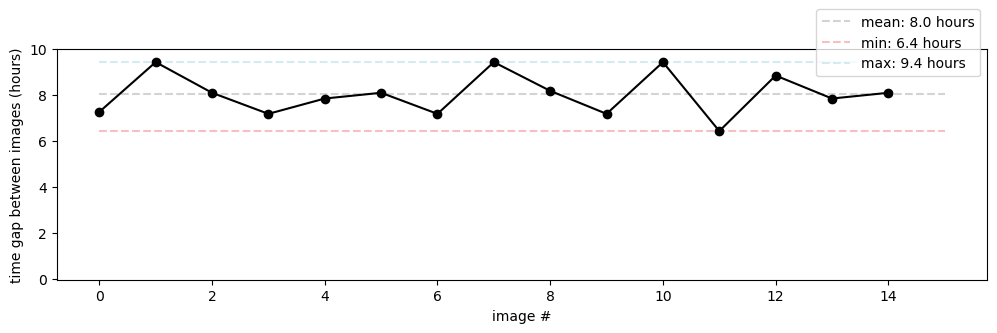

In [6]:

sorted_dates = sequential_list[:,2]
date_list_time_gap = np.array([])
for dd in np.arange(len(sorted_dates)-1):
    hour_gap = (sorted_dates[dd+1]-sorted_dates[dd]).total_seconds()/3600
    date_list_time_gap = np.append(date_list_time_gap, hour_gap)
    
    
import matplotlib.pyplot as plt
import math
fig = plt.subplots(figsize=(12,3))
plt.plot(date_list_time_gap, c='k', marker='o')
plt.hlines(np.mean(date_list_time_gap), 0, len(date_list_time_gap), linestyles='dashed', colors='lightgray', zorder=-1, label=f'mean: {np.mean(date_list_time_gap):.1f} hours')
plt.hlines(np.min(date_list_time_gap), 0, len(date_list_time_gap), linestyles='dashed', colors='lightcoral', alpha=0.5, zorder=-1, label=f'min: {np.min(date_list_time_gap):.1f} hours')
plt.hlines(np.max(date_list_time_gap), 0, len(date_list_time_gap), linestyles='dashed', colors='lightblue', alpha=0.5, zorder=-1, label=f'max: {np.max(date_list_time_gap):.1f} hours')
plt.xlabel('image #')
plt.ylabel('time gap between images (hours)')
plt.legend(bbox_to_anchor=(1,1.2))
plt.ylim(-0.05, math.ceil(np.max(date_list_time_gap)))

In [7]:
png_list = []

for file in os.listdir(Folder):
    if file.endswith(".png"):
        png_list.append(file)
#         print(os.path.join("/mydir", file))
        
png_list
# for file in glob.glob("*.png"):
# #     print(file)
#     png_list.append(file)

['MOD021KM.A2012078.0540_base.png',
 'MOD021KM.A2012078.2220_base.png',
 'MOD021KM.A2012079.0625_base.png',
 'MOD021KM.A2012079.2125_base.png',
 'MOD021KM.A2012080.0530_base.png',
 'MOD021KM.A2012080.2205_base.png',
 'MOD021KM.A2012081.0615_base.png',
 'MOD021KM.A2012081.2250_base.png',
 'MOD021KM.A2012082.0515_base.png',
 'MOD021KM.A2012082.2155_base.png',
 'MOD021KM.A2012083.0600_base.png',
 'MYD021KM.A2012078.1255_base.png',
 'MYD021KM.A2012079.1335_base.png',
 'MYD021KM.A2012080.1240_base.png',
 'MYD021KM.A2012081.1325_base.png',
 'MYD021KM.A2012082.1405_base.png']

In [8]:
# downsized[0].save(fp=out_name, format='GIF', append_images=downsized[1:],
#                   quality=quality, save_all=True,
#                   duration=250, loop=0, optimize=True)

### Converting from .avi to .mp4

In [9]:
import os

def convert_avi_to_mp4(avi_file):
    
    ffmpeg_path='/opt/anaconda3/envs/geoenvOSU/bin/ffmpeg'
    
    output_name = avi_file.split('.avi')[0]
    
    # decreases resolution(and file size)
#     os.popen("{ffmpeg_path} -i {input} -ac 2 -b:v 2000k -c:a aac -c:v libx264 -b:a 160k -vprofile high -bf 0 -strict experimental -f mp4 {output}.mp4".format(ffmpeg_path = ffmpeg_path, input = avi_file_path, output = output_name))
    
    # higher resolution
    os.popen("{ffmpeg_path} -i {input} -c:v libx264 -crf 19 -preset slow -c:a libfdk_aac -b:a 192k -ac 2 {output}.mp4".format(ffmpeg_path = ffmpeg_path, input = avi_file, output = output_name))
    
    print(f'saving as {output_name}.mp4')
    return True

In [10]:
# convert_avi_to_mp4('/Volumes/Jewell_EasyStore/SIDEx2021/MODIS_animation/SIDEx_2021event_MODIS_2021073.0435_to_2021080.2255.avi', 
#                    '/Volumes/Jewell_EasyStore/SIDEx2021/MODIS_animation/SIDEx_2021event_MODIS')


convert_avi_to_mp4(Folder+exportname)



saving as /Volumes/Jewell_EasyStore/MODIS_2012_animation/updated/animation/MODIS_2012_animation_2012078.0540_to_2012083.0600_base.mp4


True

ffmpeg version 4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 12.0.1
  configuration: --prefix=/opt/anaconda3/envs/geoenvOSU --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/Users/runner/miniforge3/conda-bld/ffmpeg_1645955481026/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
  libpostproc    55.  7.100 / 55.  7.100
[avi @ 0x7fa59f00b200] Stream #0: not enough frames to estim